In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pay_scale.csv")
df = df.drop(df.columns[0], axis=1)


In [3]:
df.head()

,Major,Degree_type,Early Career Pay,Mid Career Pay,% High Meaning,Field Type
0,Petroleum Engineering,Bachelors,93200.0,187300.0,0.67,STEM
1,Operations Research & Industrial Engineering,Bachelors,84800.0,170400.0,0.28,STEM
2,Electrical Engineering & Computer Science (EECS),Bachelors,108500.0,159300.0,0.46,STEM
3,Interaction Design,Bachelors,68300.0,155800.0,0.55,OTHER FIELDS
4,Public Accounting,Bachelors,59800.0,147700.0,0.47,BUSINESS


# MAJORS WITH HIGHEST EARLY CAREER PAY (0-5 years experience)

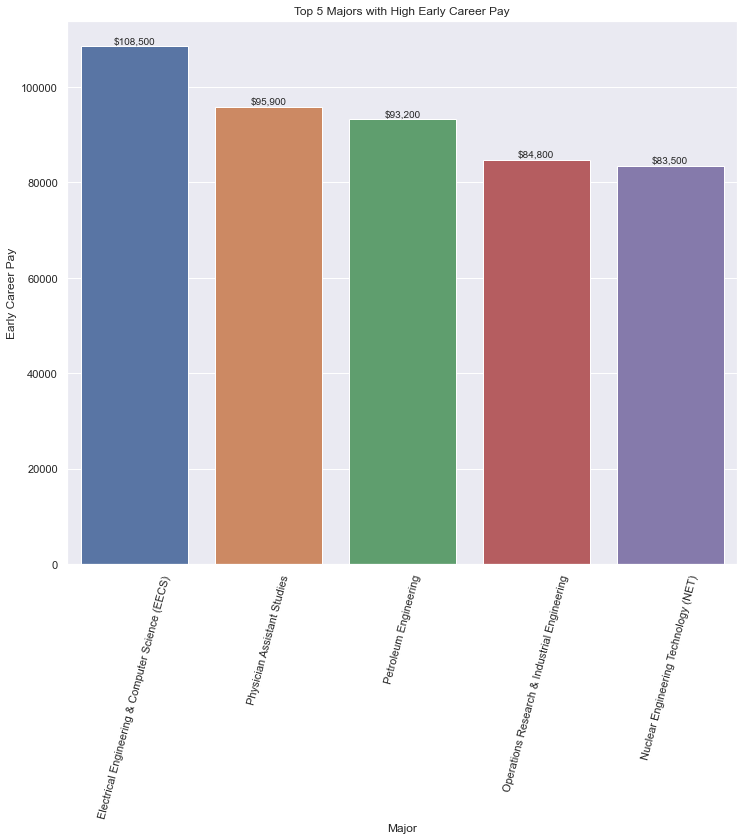

In [12]:
# Sort the DataFrame by Early Career Pay in descending order
df = df.sort_values(by="Early Career Pay", ascending=False)

# Select the top 5 majors with the highest Early Career Pay
top_majors = df.head(5)

# Extract the Major and Early Career Pay columns
majors = top_majors["Major"]
early_career_pay = top_majors["Early Career Pay"]


# Set the figure size to 8 inches wide and 6 inches tall
sns.set(rc={'figure.figsize':(12,10)})

# Create the bar plot
sns.barplot(x="Major", y="Early Career Pay", data=top_majors)
plt.xlabel("Major")
plt.ylabel("Early Career Pay")
plt.title("Top 5 Majors with High Early Career Pay")
plt.xticks(rotation=75)

# Add data labels to the bars
for i, v in enumerate(early_career_pay):
    plt.text(i, v + 500, f"${v:,.0f}", ha="center", fontsize=10)

plt.show()

# MAJORS WITH HIGHEST MID-CAREER PAY (10+ EXPERIENCE)

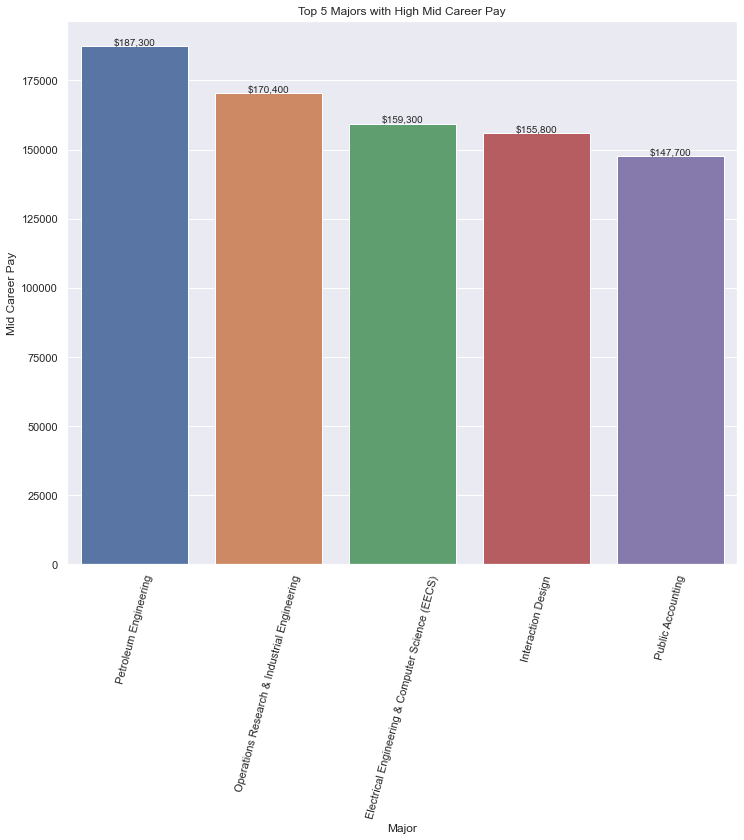

In [5]:
# Sort the DataFrame by Mid Career Pay in descending order
df = df.sort_values(by="Mid Career Pay", ascending=False)

# Select the top 5 majors with the highest Mid Career Pay
top_majors = df.head(5)

# Extract the Major and Mid Career Pay columns
majors = top_majors["Major"]
mid_career_pay = top_majors["Mid Career Pay"]

# Set the figure size to 12 inches wide and 10 inches tall
sns.set(rc={'figure.figsize':(12,10)})

# Create the bar plot
sns.barplot(x="Major", y="Mid Career Pay", data=top_majors)
plt.xlabel("Major")
plt.ylabel("Mid Career Pay")
plt.title("Top 5 Majors with High Mid Career Pay")
plt.xticks(rotation=75)

# Add data labels to the bars
for i, v in enumerate(mid_career_pay):
    plt.text(i, v + 500, f"${v:,.0f}", ha="center", fontsize=10)

plt.show()


# REALATIONSHIP BETWEEN EARLY CAREER PAY AND MID CAREER PAY

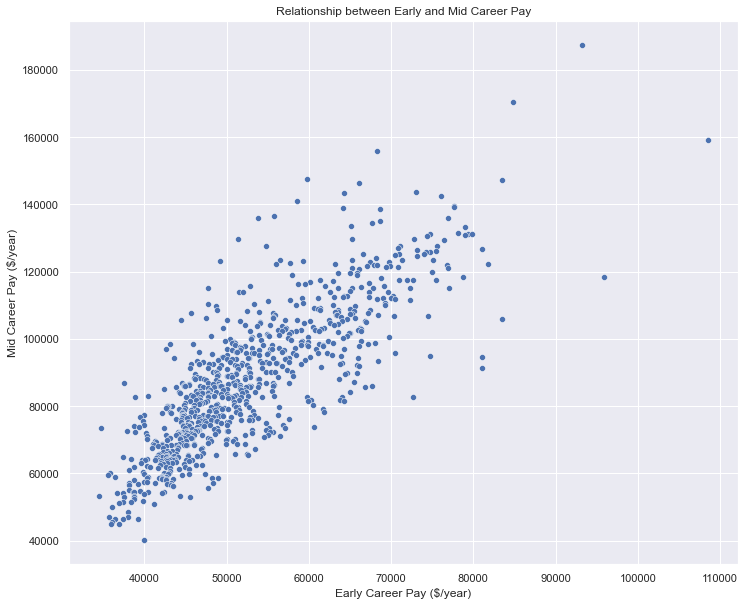

In [7]:
# Set the figure size to 12 inches wide and 10 inches tall
sns.set(rc={'figure.figsize':(12,10)})

# Create the scatter plot
sns.scatterplot(x="Early Career Pay", y="Mid Career Pay", data=df)
plt.xlabel("Early Career Pay ($/year)")
plt.ylabel("Mid Career Pay ($/year)")
plt.title("Relationship between Early and Mid Career Pay")


plt.show()


# Linear regression model to test accuracy of relationship between early and mid salary

This code uses the train_test_split function from sklearn.model_selection to split the data into training and test sets. It then creates a linear regression model using the LinearRegression class and fits the model to the training data using the fit method.

Next, it makes predictions on the test data using the predict method and calculates the accuracy score using the score method. The accuracy score is a measure of how well the model fits the data. A higher score indicates a better fit.

In [8]:
# Import the LinearRegression class and train_test_split function from the sklearn.linear_model and sklearn.model_selection modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[["Early Career Pay"]], df[["Mid Career Pay"]], test_size=0.2)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = model.score(X_test, y_test)

# Print the accuracy score
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.66


# Residual plots to test accuracy of the relationship

This code uses the residplot function to create a residual plot, which shows the residuals (i.e., the difference between the predicted values and the actual values) as a function of the predictor variable (Early Career Pay in this case).

A well-fitting linear regression model will have residuals that are randomly distributed around zero, indicating that the model is a good fit for the data. If the residuals are not randomly distributed, it may indicate that the model is not a good fit or that there are other factors influencing the response variable (Mid Career Pay in this case).

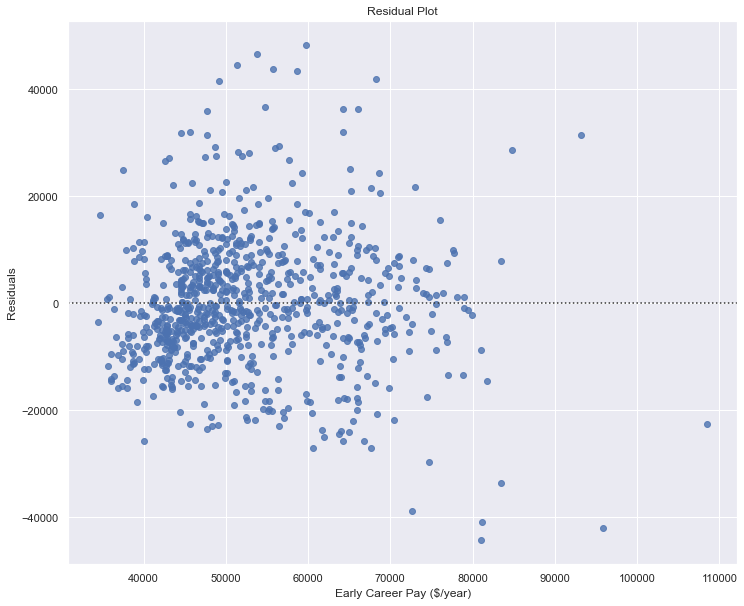

In [9]:
# Set the figure size to 12 inches wide and 10 inches tall
sns.set(rc={'figure.figsize':(12,10)})

# Create the residual plot
sns.residplot(x="Early Career Pay", y="Mid Career Pay", data=df)
plt.xlabel("Early Career Pay ($/year)")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()


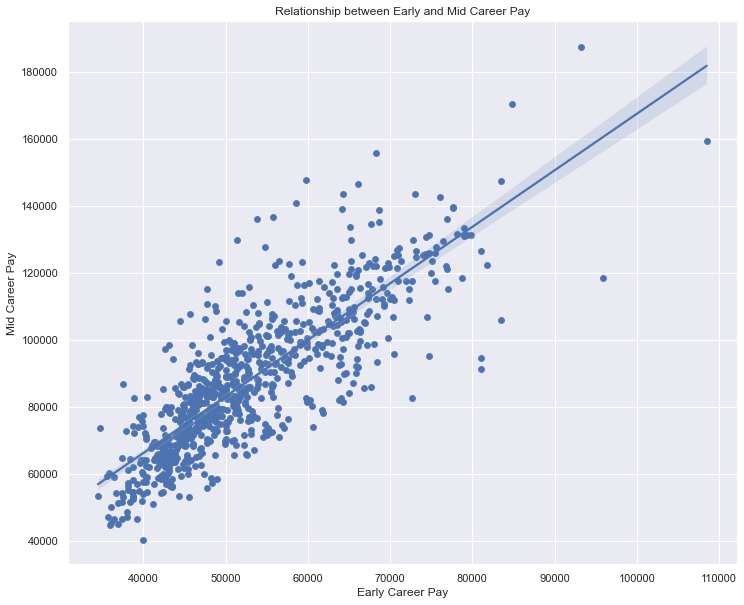

In [10]:
# Set the figure size to 12 inches wide and 10 inches tall
sns.set(rc={'figure.figsize':(12,10)})

# Create the scatter plot
sns.scatterplot(x="Early Career Pay", y="Mid Career Pay", data=df)
plt.xlabel("Early Career Pay")
plt.ylabel("Mid Career Pay")
plt.title("Relationship between Early and Mid Career Pay")

# Fit a linear regression model
model = sns.regplot(x="Early Career Pay", y="Mid Career Pay", data=df)
plt.show()
